In [1]:
!pip install pandas
!pip install xgboost
!pip install catboost

In [2]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestRegressor

# Read Files

In [3]:
df = pd.read_csv('hourly_weather_data_train.csv')
pd.read_csv('hourly_weather_data_202207_test_MV.csv')
data = df
test = pd.read_csv('hourly_weather_data_202207_test_MV.csv')

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (4,5,11,12,13,14,16,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Options

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

# GENERAL

In [5]:
#remove all rows where date is previous to 2020
data = data[data.DATE>='2020-01-01']
#remove one wird row with "*" values
data = data.drop(data[data.HourlyDewPointTemperature == '*'].index)
test = test.drop(test[test.HourlyDewPointTemperature == '*'].index)

# STATION

In [6]:
#remove station column
del data['STATION']
del test['STATION']

# DATE

In [7]:
#convert to dateTime
data.loc[:,'DATE'] = pd.to_datetime(data.loc[:,'DATE'])

#round to nearest hour
data.loc[:,'DATE'] = data.loc[:,'DATE'].dt.round('H')

#split into seperate hour and month columns
data.loc[:,'hour'] = data.loc[:,'DATE'].dt.hour
data.loc[:,'month'] = data.loc[:,'DATE'].dt.month
#df['year'] = df['DATE'].dt.year

#remove original date column after merge

#convert to dateTime
test.loc[:,'DATE'] = pd.to_datetime(test.loc[:,'DATE'])

#round to nearest hour
test.loc[:,'DATE'] = test.loc[:,'DATE'].dt.round('H')

#split into seperate hour and month columns
test.loc[:,'hour'] = test.loc[:,'DATE'].dt.hour
test.loc[:,'month'] = test.loc[:,'DATE'].dt.month
#df['year'] = df['DATE'].dt.year

#remove original date column after merge

# REPORT_TYPE

In [8]:
#remove column
del data['REPORT_TYPE']
del test['REPORT_TYPE']

# SOURCE

In [9]:
#remove all rows where SOURCE == 4,6
data = data.drop(data.index[data.loc[:,'SOURCE']==4])
data = data.drop(data.index[data.loc[:,'SOURCE']==6])

test = test.drop(test.index[test.loc[:,'SOURCE']==4])
test = test.drop(test.index[test.loc[:,'SOURCE']==6])

In [10]:
del data['SOURCE']
del test['SOURCE']

# HourlyAltimeterSetting

In [11]:
#fill na values with previous hour's value (close aproximation)
data.loc[:,'HourlyAltimeterSetting'] = data.loc[:,'HourlyAltimeterSetting'].fillna(method='bfill')

#strip non numeric and convert to float
data.HourlyAltimeterSetting = data.HourlyAltimeterSetting.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

data['HourlyAltimeterSetting'].isna().sum()


#fill na values with previous hour's value (close aproximation)
test.loc[:,'HourlyAltimeterSetting'] = test.loc[:,'HourlyAltimeterSetting'].fillna(method='bfill')

#strip non numeric and convert to float
test.HourlyAltimeterSetting = test.HourlyAltimeterSetting.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

test['HourlyAltimeterSetting'].isna().sum()

0

# HourlyDewPointTemperature

In [12]:
#bfill na values
data.loc[:,'HourlyDewPointTemperature'] = data.loc[:,'HourlyDewPointTemperature'].fillna(method='bfill')

#convert to float
data.HourlyDewPointTemperature = data.HourlyDewPointTemperature.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

data['HourlyDewPointTemperature'].isna().sum()

#bfill na values
test.loc[:,'HourlyDewPointTemperature'] = test.loc[:,'HourlyDewPointTemperature'].fillna(method='bfill')

#convert to float
test.HourlyDewPointTemperature = test.HourlyDewPointTemperature.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

test['HourlyDewPointTemperature'].isna().sum()

0

# HourlyDryBulbTemperature

In [13]:
#bfill na values
data.loc[:,'HourlyDryBulbTemperature'] = data.loc[:,'HourlyDryBulbTemperature'].fillna(method='bfill')

#convert to float
data.HourlyDryBulbTemperature = data.HourlyDryBulbTemperature.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

data['HourlyDryBulbTemperature'].isna().sum()

#bfill na values
test.loc[:,'HourlyDryBulbTemperature'] = test.loc[:,'HourlyDryBulbTemperature'].fillna(method='bfill')

#convert to float
test.HourlyDryBulbTemperature = test.HourlyDryBulbTemperature.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

test['HourlyDryBulbTemperature'].isna().sum()

0

# HourlyPrecipitation

In [14]:
#replace 'T' with 0
data.loc[:,'HourlyPrecipitation'] = data.loc[:,'HourlyPrecipitation'].replace(to_replace='T', value=0)

#fillna bfill
data.loc[:,'HourlyPrecipitation'] = data.loc[:,'HourlyPrecipitation'].fillna(method='bfill')

#convert to float
data.HourlyPrecipitation = data.HourlyPrecipitation.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

data['HourlyPrecipitation'].isna().sum()

#replace 'T' with 0
test.loc[:,'HourlyPrecipitation'] = test.loc[:,'HourlyPrecipitation'].replace(to_replace='T', value=0)

#fillna bfill
test.loc[:,'HourlyPrecipitation'] = test.loc[:,'HourlyPrecipitation'].fillna(method='bfill')

#convert to float
test.HourlyPrecipitation = test.HourlyPrecipitation.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

test['HourlyPrecipitation'].isna().sum()

0

# HourlyPresentWeatherType

In [15]:
#remove column because too many na values (84% missing)
del data['HourlyPresentWeatherType']
del test['HourlyPresentWeatherType']

# HourlyPressureChange

In [16]:
#replace nan with 0
data.loc[:,'HourlyPressureChange'] = data.loc[:,'HourlyPressureChange'].fillna(0)
data['HourlyPressureChange'].isna().sum()

#replace nan with 0
test.loc[:,'HourlyPressureChange'] = test.loc[:,'HourlyPressureChange'].fillna(0)
test['HourlyPressureChange'].isna().sum()

0

# HourlyPressureTendency

In [17]:
#0 - 8 scale with 4 being no change 
#replace nan with 4
data.loc[:,'HourlyPressureTendency'] = data.loc[:,'HourlyPressureTendency'].fillna(4)

#sub 4 so no change is rep by 0
data.loc[:,'HourlyPressureTendency'] = data.assign(HourlyPressureTendency = lambda x: data.loc[:,'HourlyPressureTendency'] - 4)

data['HourlyPressureTendency'].isna().sum()

test.loc[:,'HourlyPressureTendency'] = test.loc[:,'HourlyPressureTendency'].fillna(4)

#sub 4 so no change is rep by 0
test.loc[:,'HourlyPressureTendency'] = test.assign(HourlyPressureTendency = lambda x: test.loc[:,'HourlyPressureTendency'] - 4)

test['HourlyPressureTendency'].isna().sum()

0

# HourlyRelativeHumidity

In [18]:
#delete two duplicate columns
del data['HourlyRelativeHumidity.1']
del data['HourlyRelativeHumidity.2']

del test['HourlyRelativeHumidity.1']
del test['HourlyRelativeHumidity.2']

In [19]:
#HourlyRelativeHumidity cont

#bfill na values
data.loc[:,'HourlyRelativeHumidity'] = data.loc[:,'HourlyRelativeHumidity'].fillna(method='bfill')
#data.loc[:,'HourlyDewPointTemperature'] = data.loc[:,'HourlyDewPointTemperature'].fillna(0) #if first pass doesn't work

#convert to float
data.HourlyRelativeHumidity = data.HourlyRelativeHumidity.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

data['HourlyRelativeHumidity'].isna().sum()

#HourlyRelativeHumidity cont

#bfill na values
test.loc[:,'HourlyRelativeHumidity'] = test.loc[:,'HourlyRelativeHumidity'].fillna(method='bfill')
#data.loc[:,'HourlyDewPointTemperature'] = data.loc[:,'HourlyDewPointTemperature'].fillna(0) #if first pass doesn't work

#convert to float
test.HourlyRelativeHumidity = test.HourlyRelativeHumidity.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

test['HourlyRelativeHumidity'].isna().sum()

0

# HourlySeaLevelPressure

In [20]:
#bfill na values
data.loc[:,'HourlySeaLevelPressure'] = data.loc[:,'HourlySeaLevelPressure'].fillna(method='bfill')

#convert to float
data.HourlySeaLevelPressure = data.HourlySeaLevelPressure.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)
data.loc[:,'HourlySeaLevelPressure'] = data.loc[:,'HourlySeaLevelPressure'].fillna(data['HourlySeaLevelPressure'].mean)

#drop some stuborn nan values
data = data.drop(data[data['HourlyRelativeHumidity'].isna()].index)

data['HourlyRelativeHumidity'].isna().sum()

#bfill na values
test.loc[:,'HourlySeaLevelPressure'] = test.loc[:,'HourlySeaLevelPressure'].fillna(method='bfill')

#convert to float
test.HourlySeaLevelPressure = test.HourlySeaLevelPressure.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)
test.loc[:,'HourlySeaLevelPressure'] = test.loc[:,'HourlySeaLevelPressure'].fillna(test['HourlySeaLevelPressure'].mean)

#drop some stuborn nan values
test = test.drop(test[test['HourlyRelativeHumidity'].isna()].index)

test['HourlyRelativeHumidity'].isna().sum()

0

# HourlySkyConditions

In [21]:
#bfill na values
data.loc[:,'HourlySkyConditions'] = data.loc[:,'HourlySkyConditions'].fillna(method='bfill')
# make boolean columns for each possible sky condition, ignoring height
sky_conditions = ['FEW','SCT', 'BKN', 'CLR', 'OVC','VV', '10']
for sky_condition in sky_conditions:
   data[sky_condition] = data.HourlySkyConditions.str.replace(r'\d+','').str.replace(':', '').str.contains(sky_condition).astype(int) 
data = data.rename(columns = {'10':'c10'})

#bfill na values
test.loc[:,'HourlySkyConditions'] = test.loc[:,'HourlySkyConditions'].fillna(method='bfill')
# make boolean columns for each possible sky condition, ignoring height
sky_conditions = ['FEW','SCT', 'BKN', 'CLR', 'OVC','VV', '10']
for sky_condition in sky_conditions:
   test[sky_condition] = test.HourlySkyConditions.str.replace(r'\d+','').str.replace(':', '').str.contains(sky_condition).astype(int) 
test = test.rename(columns = {'10':'c10'})

In [22]:
#remove HourlySkyConditions column
del data['HourlySkyConditions']
del test['HourlySkyConditions']

# HourlyStationPressure

In [23]:
#bfill na values
data.loc[:,'HourlyStationPressure'] = data.loc[:,'HourlyStationPressure'].fillna(method='bfill')

#convert to float
data.HourlyStationPressure = data.HourlyStationPressure.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

data['HourlyStationPressure'].isna().sum()

#bfill na values
test.loc[:,'HourlyStationPressure'] = test.loc[:,'HourlyStationPressure'].fillna(method='bfill')

#convert to float
test.HourlyStationPressure = test.HourlyStationPressure.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

test['HourlyStationPressure'].isna().sum()

0

# HourlyVisibility

In [24]:
#convert to float
data.HourlyVisibility = data.HourlyVisibility.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

data['HourlyVisibility'].isna().sum()

#convert to float
test.HourlyVisibility = test.HourlyVisibility.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

test['HourlyVisibility'].isna().sum()

0

# HourlyWetBulbTemperature

In [25]:
#bfill na values
data.loc[:,'HourlyWetBulbTemperature'] = data.loc[:,'HourlyWetBulbTemperature'].fillna(method='bfill')

#convert to float
data.HourlyWetBulbTemperature = data.HourlyWetBulbTemperature.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

data['HourlyWetBulbTemperature'].isna().sum()

#bfill na values
test.loc[:,'HourlyWetBulbTemperature'] = test.loc[:,'HourlyWetBulbTemperature'].fillna(method='bfill')

#convert to float
test.HourlyWetBulbTemperature = test.HourlyWetBulbTemperature.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

test['HourlyWetBulbTemperature'].isna().sum()

0

# HourlyWind

In [26]:
#bfill na values
data.loc[:,'HourlyWindDirection'] = data.loc[:,'HourlyWindDirection'].fillna(method='bfill')

#Create one hot 
one_hot = pd.get_dummies(data['HourlyWindDirection'])

#join one hot
data = data.join(one_hot)

data['HourlyWindDirection'].isna().sum()

#bfill na values
test.loc[:,'HourlyWindDirection'] = test.loc[:,'HourlyWindDirection'].fillna(method='bfill')

#Create one hot 
one_hot = pd.get_dummies(test['HourlyWindDirection'])

#join one hot
test = test.join(one_hot)

test['HourlyWindDirection'].isna().sum()

0

In [27]:
#delete col
del data['HourlyWindDirection']
del test['HourlyWindDirection']


# HourlyWindGustSpeed

In [28]:
#fill na values with 0
data.loc[:,'HourlyWindGustSpeed'] = data.loc[:,'HourlyWindGustSpeed'].fillna(0)

#convert to float
data.HourlyWindGustSpeed = data.HourlyWindGustSpeed.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

data['HourlyWindGustSpeed'].isna().sum()

#fill na values with 0
test.loc[:,'HourlyWindGustSpeed'] = test.loc[:,'HourlyWindGustSpeed'].fillna(0)

#convert to float
test.HourlyWindGustSpeed = test.HourlyWindGustSpeed.astype(str).str.replace(r"[a-zA-Z]",'').astype(float)

test['HourlyWindGustSpeed'].isna().sum()

0

# HourlyWindSpeed

In [29]:
#bfill na values
data.loc[:,'HourlyWindSpeed'] = data.loc[:,'HourlyWindSpeed'].fillna(method='bfill')

#convert to float
data.loc[:,'HourlyWindSpeed'] = data.loc[:,'HourlyWindSpeed'].astype(float)

data['HourlyWindSpeed'].isna().sum()

#bfill na values
test.loc[:,'HourlyWindSpeed'] = test.loc[:,'HourlyWindSpeed'].fillna(method='bfill')

#convert to float
test.loc[:,'HourlyWindSpeed'] = test.loc[:,'HourlyWindSpeed'].astype(float)

test['HourlyWindSpeed'].isna().sum()

0

# Testing

In [30]:
#data.isna().sum()

In [31]:
#percentage of values are null
#original set
#df.isna().sum()/df.shape[0]
#present set
#data.isna().sum()#/data.shape[0]
#data['HourlyAltimeterSetting'].isna()
#data.dtypes


# Solar Prod Test Data

In [32]:
prod20 = pd.read_csv('prod_data_2020_train.csv')
prod21 = pd.read_csv('prod_data_2021_train.csv')
prod22 = pd.read_csv('prod_data_2022_train.csv')
prod20['DATE'] = pd.to_datetime(prod20['LDate'])
prod21['DATE'] = pd.to_datetime(prod21['LDate'])
prod22['DATE'] = pd.to_datetime(prod22['LDate'])
prod20['DATE'] = prod20['DATE'].dt.round('H')
prod20.set_index('DATE')
prod21['DATE'] = prod21['DATE'].dt.round('H')
prod21.set_index('DATE')
prod22['DATE'] = prod22['DATE'].dt.round('H')
prod22.set_index('DATE')
prod = pd.concat([prod20, prod21, prod22], axis=0)
data = pd.merge(data, prod, how='inner', on='DATE')

prodTest = pd.read_csv('prod_data_202207_test.csv')
prodTest['DATE'] = pd.to_datetime(prodTest['LDate'])
prodTest['DATE'] = prodTest['DATE'].dt.round('H')
prodTest.set_index('DATE')
test = pd.merge(test, prodTest, how='inner', on='DATE')
test.shape

(900, 71)

In [33]:
del data['LDate']
del test['LDate']

# Covariance

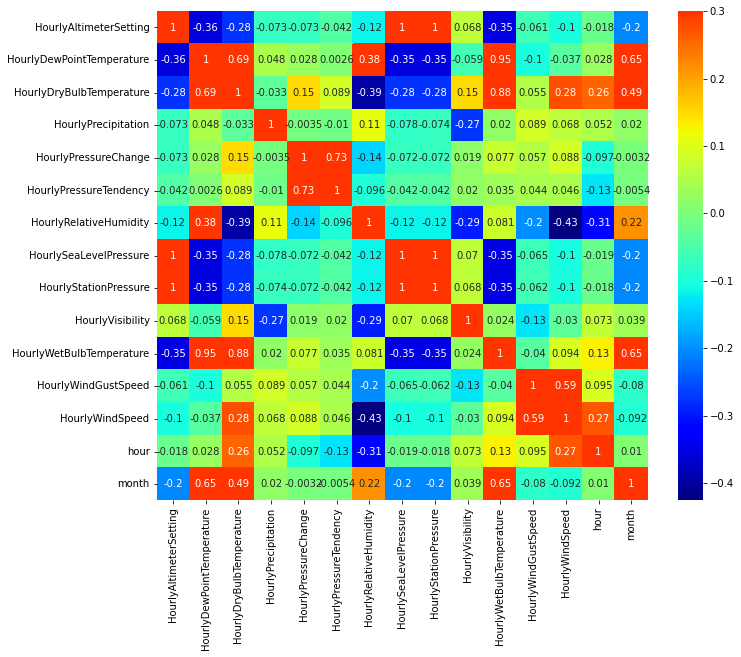

In [34]:
independent_var = data[['HourlyAltimeterSetting', 'HourlyDewPointTemperature',
       'HourlyDryBulbTemperature', 'HourlyPrecipitation',
       'HourlyPressureChange', 'HourlyPressureTendency',
       'HourlyRelativeHumidity', 'HourlySeaLevelPressure',
       'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature',
       'HourlyWindGustSpeed', 'HourlyWindSpeed', 'hour', 'month']]
f, ax = plt.subplots(figsize=(11, 9))
sn.heatmap(independent_var.corr(), cmap='jet', vmax=.3, center=0, annot=True)

# Training the Model

In [35]:
data.columns

Index(['DATE', 'HourlyAltimeterSetting', 'HourlyDewPointTemperature',
       'HourlyDryBulbTemperature', 'HourlyPrecipitation',
       'HourlyPressureChange', 'HourlyPressureTendency',
       'HourlyRelativeHumidity', 'HourlySeaLevelPressure',
       'HourlyStationPressure', 'HourlyVisibility', 'HourlyWetBulbTemperature',
       'HourlyWindGustSpeed', 'HourlyWindSpeed', 'hour', 'month', 'FEW', 'SCT',
       'BKN', 'CLR', 'OVC', 'VV', 'c10', '0', '10', '100', '110', '120', '130',
       '140', '150', '160', '170', '180', '190', '20', '200', '210', '220',
       '230', '240', '250', '260', '270', '280', '290', '30', '300', '310',
       '320', '330', '340', '350', '360', '40', '50', '60', '70', '80', '90',
       'VRB', 'Temp', 'Jax Solar', 'NW Jax', 'Old Plank', 'Starratt', 'Blair',
       'Simmons', 'Old Kings', 'SunPort'],
      dtype='object')

In [36]:
locations = ['Jax Solar', 'NW Jax', 'Old Plank', 'Starratt', 'Blair', 'Simmons', 'Old Kings', 'SunPort']
#removing correlated variables
X = data[['HourlyAltimeterSetting', 'HourlyDewPointTemperature',
       'HourlyDryBulbTemperature', 'HourlyPrecipitation',
       'HourlyPressureChange', 
       'HourlyRelativeHumidity',
       'HourlyStationPressure', 'HourlyWetBulbTemperature',
       'HourlyWindGustSpeed', 'HourlyWindSpeed', 'hour', 'month', 'FEW', 'SCT',
       'BKN', 'CLR', 'OVC', 'VV', 'c10', '0', '10', '100', '110', '120', '130',
       '140', '150', '160', '170', '180', '190', '20', '200', '210', '220',
       '230', '240', '250', '260', '270', '280', '290', '30', '300', '310',
       '320', '330', '340', '350', '360', '40', '50', '60', '70', '80', '90',
       'VRB']]
Y = {}
for location in locations:
       Y[location] = data[location]

### XGBBoost

In [37]:
xg_models = {}
for location in locations:
    X_train, X_valid, y_train, y_valid = train_test_split(X, Y[location], test_size=0.20)
    xg_model = XGBRegressor(objective='reg:squarederror', booster='dart')
    xg_model.fit(X_train, y_train)
    xg_model.predict(X_valid)
    xg_models[location] = xg_model
    y_pred = xg_model.predict(X_valid)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_valid, predictions)
    print(f"{location} Accuracy for: %.2f%%" % (accuracy * 100.0))

Jax Solar Accuracy for: 66.66%
NW Jax Accuracy for: 69.81%
Old Plank Accuracy for: 81.80%
Starratt Accuracy for: 80.84%
Blair Accuracy for: 80.29%
Simmons Accuracy for: 92.64%
Old Kings Accuracy for: 92.44%
SunPort Accuracy for: 70.58%


### Random Forest (RF)

In [38]:
rf_models = {}
for location in locations:
    X_train, X_valid, y_train, y_valid = train_test_split(X, Y[location], test_size=0.20)
    rf_model = RandomForestRegressor(n_estimators = 1000)
    rf_model.fit(X_train, y_train)
    score = rf_model.score(X_valid, y_valid)
    rf_models[location] = rf_model
    print(f"{location} R2 {score}")

Jax Solar R2 0.889789226058074
NW Jax R2 0.9027949424078024
Old Plank R2 0.8146610279682895
Starratt R2 0.8807116375293236
Blair R2 0.8427123969459281
Simmons R2 0.8181361601093347
Old Kings R2 0.7352577748044522
SunPort R2 0.8696960175480231


# Testing Data

In [39]:
for location in locations:
    X_test = test[['HourlyAltimeterSetting', 'HourlyDewPointTemperature',
        'HourlyDryBulbTemperature', 'HourlyPrecipitation',
        'HourlyPressureChange', 
        'HourlyRelativeHumidity',
        'HourlyStationPressure', 'HourlyWetBulbTemperature',
        'HourlyWindGustSpeed', 'HourlyWindSpeed', 'hour', 'month', 'FEW', 'SCT',
        'BKN', 'CLR', 'OVC', 'VV', 'c10', '0', '10', '100', '110', '120', '130',
        '140', '150', '160', '170', '180', '190', '20', '200', '210', '220',
        '230', '240', '250', '260', '270', '280', '290', '30', '300', '310',
        '320', '330', '340', '350', '360', '40', '50', '60', '70', '80', '90',
        'VRB']]

    Y_test = test[location]

    y_pred = xg_models[location].predict(X_test)
    predictions = [round(value) for value in y_pred]
    print(location)
    accuracy = accuracy_score(Y_test, predictions)
    print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
    score = rf_models[location].score(X_test, Y_test)
    print(f"RF R2 {score}")


Jax Solar
XGB Accuracy: 56.56%
RF R2 0.7923901409719267
NW Jax
XGB Accuracy: 67.22%
RF R2 0.8842935514023176
Old Plank
XGB Accuracy: 77.00%
RF R2 0.6607695174473229
Starratt
XGB Accuracy: 78.67%
RF R2 0.8191658268130713
Blair
XGB Accuracy: 72.22%
RF R2 0.748052771963462
Simmons
XGB Accuracy: 90.33%
RF R2 0.7519220767903825
Old Kings
XGB Accuracy: 91.56%
RF R2 0.6389120136926756
SunPort
XGB Accuracy: 66.00%
RF R2 0.8486862250431626


# Visualizing Actual vs Predicted Results for Jax Solar

Text(0, 0.5, 'MWAC')

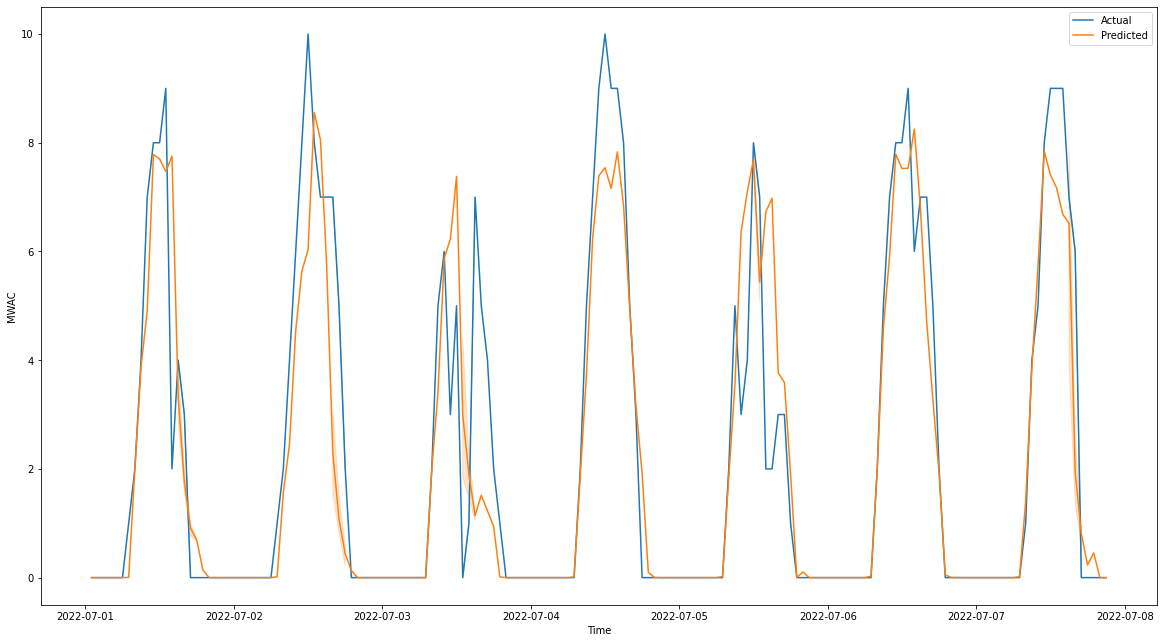

In [40]:
X_test = test[['HourlyAltimeterSetting', 'HourlyDewPointTemperature',
    'HourlyDryBulbTemperature', 'HourlyPrecipitation',
    'HourlyPressureChange', 
    'HourlyRelativeHumidity',
    'HourlyStationPressure', 'HourlyWetBulbTemperature',
    'HourlyWindGustSpeed', 'HourlyWindSpeed', 'hour', 'month', 'FEW', 'SCT',
    'BKN', 'CLR', 'OVC', 'VV', 'c10', '0', '10', '100', '110', '120', '130',
    '140', '150', '160', '170', '180', '190', '20', '200', '210', '220',
    '230', '240', '250', '260', '270', '280', '290', '30', '300', '310',
    '320', '330', '340', '350', '360', '40', '50', '60', '70', '80', '90',
    'VRB']]
display = X_test.copy(deep=True).head(200)
display['Jax Solar Pred'] = rf_models['Jax Solar'].predict(display)
display['Jax Solar'] = test['Jax Solar'].head(200)
display['DATE'] = test['DATE'].head(200)
#display['Date'] = display['DATE'].dt
f, ax = plt.subplots(figsize=(20, 11))
sn.lineplot(x = "DATE", y = "Jax Solar", data = display)
sn.lineplot(x = "DATE", y = 'Jax Solar Pred', data = display)
plt.legend(labels=["Actual","Predicted"])
sn.set(font_scale=2)
plt.xlabel('Time')
plt.ylabel('MWAC')

## Gini Index (Feature Importance)

<BarContainer object of 12 artists>

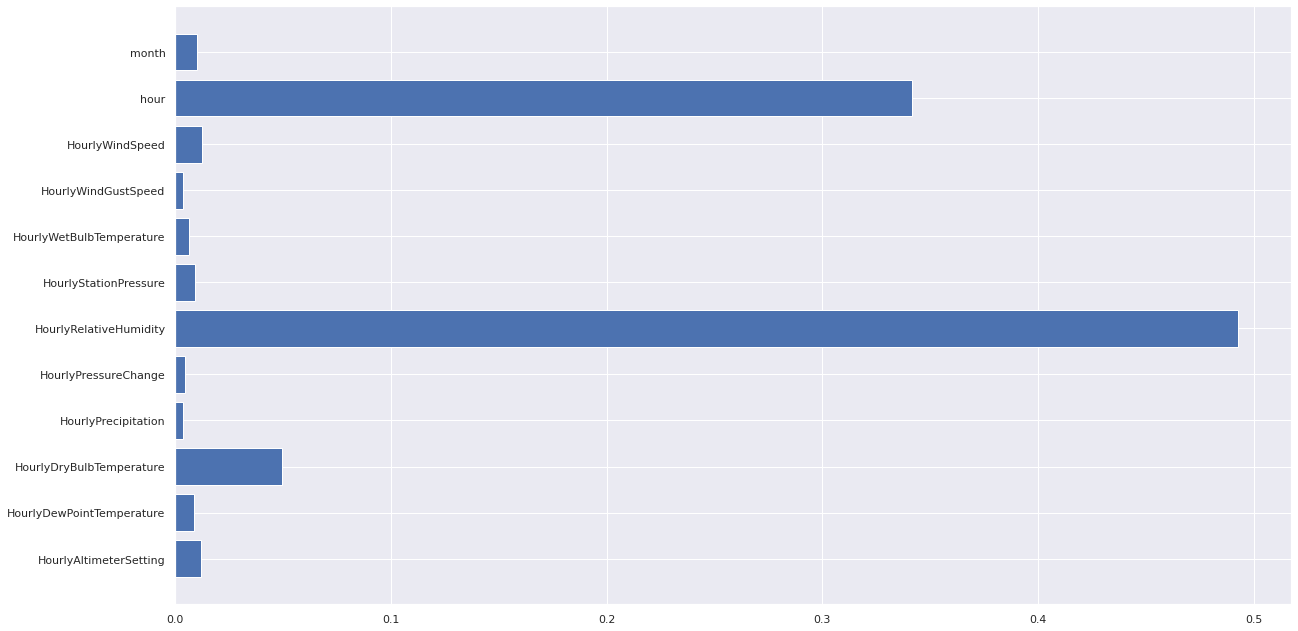

In [52]:
feature_names = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature',
    'HourlyDryBulbTemperature', 'HourlyPrecipitation',
    'HourlyPressureChange', 
    'HourlyRelativeHumidity',
    'HourlyStationPressure', 'HourlyWetBulbTemperature',
    'HourlyWindGustSpeed', 'HourlyWindSpeed', 'hour', 'month', 'FEW', 'SCT',
    'BKN', 'CLR', 'OVC', 'VV', 'c10', '0', '10', '100', '110', '120', '130',
    '140', '150', '160', '170', '180', '190', '20', '200', '210', '220',
    '230', '240', '250', '260', '270', '280', '290', '30', '300', '310',
    '320', '330', '340', '350', '360', '40', '50', '60', '70', '80', '90',
    'VRB'
]


sn.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 11))
plt.barh(feature_names[0:12],  rf_models['Jax Solar'].feature_importances_[0:12])